<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2348523_lab3_image_enhancement_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#image enhancement technique
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


here i have implemented to read the image and resize the image using cv2

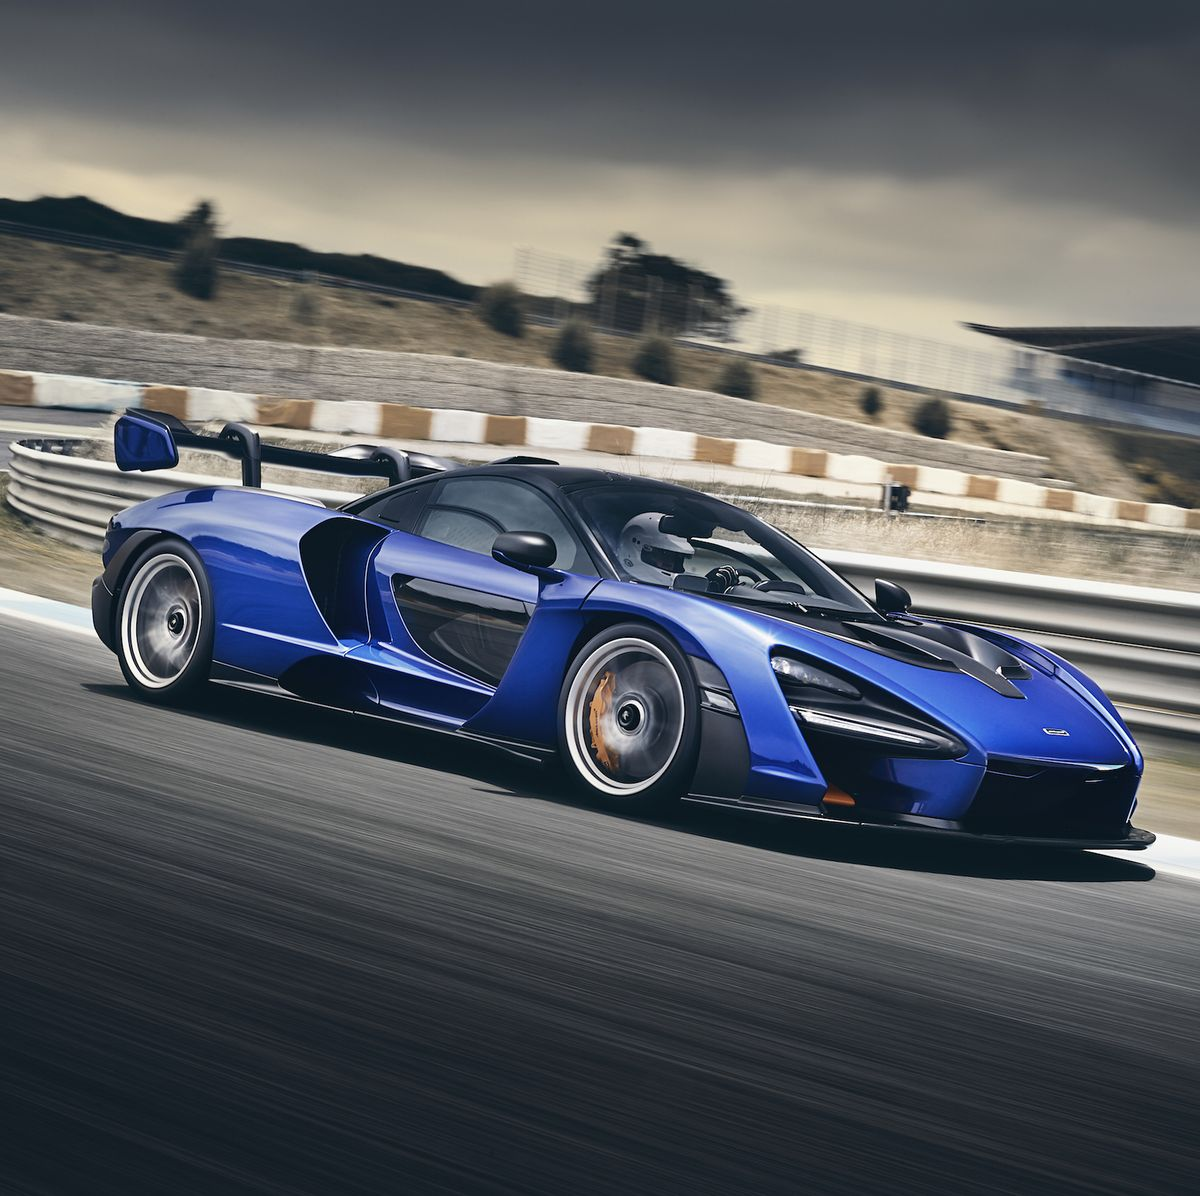

In [27]:
#reading the image
img_pth= '/content/drive/MyDrive/mclaren-senna.jpg'
img=cv2.imread(img_pth)
cv2_imshow(img)

In [28]:
img.shape

(1196, 1200, 3)

In [29]:
print(img)

[[[79 73 68]
  [79 73 68]
  [79 73 68]
  ...
  [66 57 48]
  [66 57 48]
  [66 57 48]]

 [[78 72 67]
  [78 72 67]
  [78 72 67]
  ...
  [66 57 48]
  [66 57 48]
  [66 57 48]]

 [[78 72 67]
  [78 72 67]
  [78 72 67]
  ...
  [66 57 48]
  [66 57 48]
  [66 57 48]]

 ...

 [[42 35 26]
  [43 36 27]
  [44 37 28]
  ...
  [39 32 23]
  [39 32 23]
  [39 32 23]]

 [[42 35 26]
  [44 37 28]
  [45 38 29]
  ...
  [39 32 23]
  [39 32 23]
  [39 32 23]]

 [[43 36 27]
  [44 37 28]
  [45 38 29]
  ...
  [39 32 23]
  [39 32 23]
  [39 32 23]]]


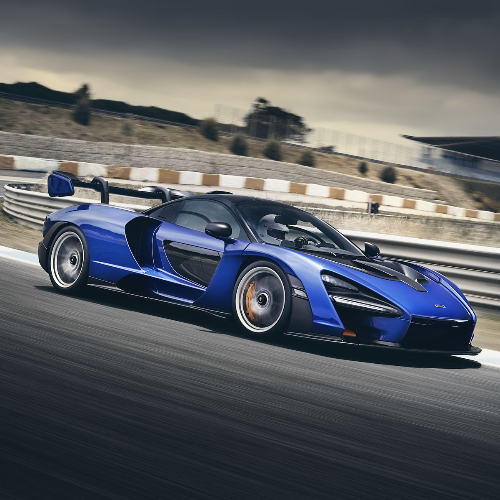

In [30]:
mclaren_img=cv2.resize(img, (500,500))
cv2_imshow(mclaren_img)

In [31]:
#save the image as jpg format using opencv
cv2.imwrite('mclaren_senna.jpg',mclaren_img)

True

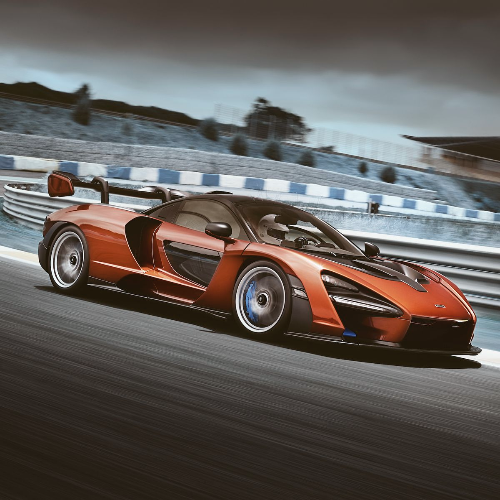

In [32]:
#converting the resized image to RGB
mclaren_img = cv2.cvtColor(mclaren_img, cv2.COLOR_BGR2RGB)
cv2_imshow(mclaren_img)

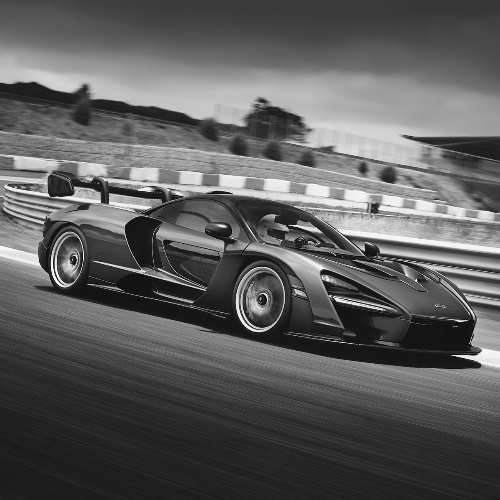

In [33]:
imagepath='mclaren_senna.jpg'
gray = cv2.imread(imagepath, 0)
cv2_imshow(gray)

In [34]:
#user defined
colored_negative = abs(255-mclaren_img)
gray_negative = abs(255-gray)

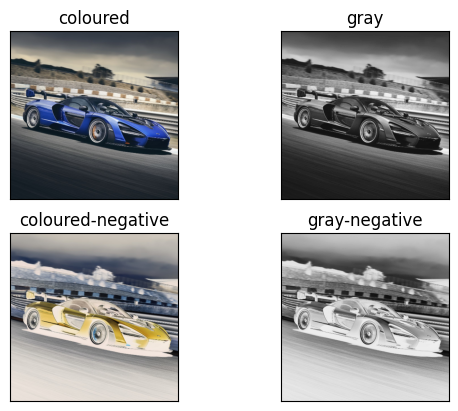

In [35]:
images=[mclaren_img,gray,colored_negative, gray_negative]
title = ['coloured', 'gray', 'coloured-negative', 'gray-negative']


plt.subplot(2, 2, 1)
plt.title(title[0])
plt.imshow(images[0])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title(title[1])
plt.imshow(images[1], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title(title[2])
plt.imshow(images[2])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title(title[3])
plt.imshow(images[3], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

-1

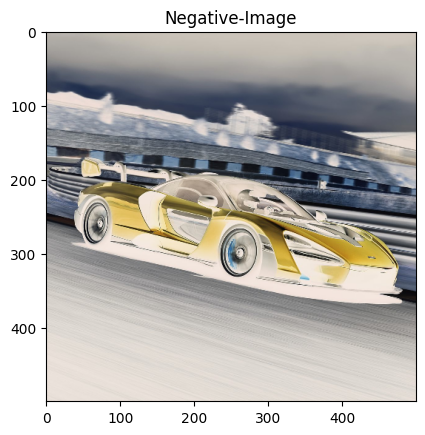

In [36]:
#built in function for image negative
negativeimg= cv2.bitwise_not(mclaren_img)
plt.title("Negative-Image")
plt.imshow(negativeimg)
cv2.waitKey(0)

In [37]:
#Gray-LevelSlicing Built-in function
from PIL import Image, ImageOps
import numpy as np

# Open the image file
image = Image.open('mclaren_senna.jpg')

# Convert the image to a NumPy array
img_array = np.array(image)

# Define the intensity levels for slicing
min_intensity = 100
max_intensity = 200

# Apply gray level slicing
mask = (img_array >= min_intensity) & (img_array <= max_intensity)
sliced_array = mask * img_array
sliced_image = Image.fromarray(sliced_array.astype('uint8'))

# Save the sliced image
sliced_image.save('sliced_mclaren_image.jpg')


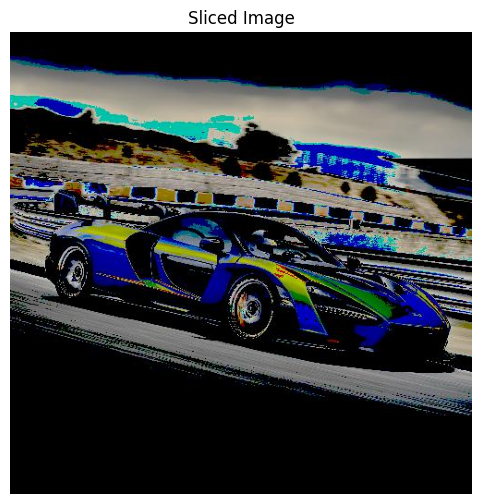

In [38]:
# Open the sliced image using the built-in function
sliced_image_pil = Image.open('sliced_mclaren_image.jpg')

# Plot the sliced image using the built-in function
plt.figure(figsize=(6, 6))
plt.imshow(sliced_image_pil)
plt.axis('off')
plt.title('Sliced Image')
plt.show()

In [39]:
import cv2
import numpy as np

def gray_level_slicing(image, min_intensity, max_intensity):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply gray level slicing
    sliced_image = np.copy(gray_image)
    sliced_image[(gray_image >= min_intensity) & (gray_image <= max_intensity)] = 255  # Set the pixels in the specified intensity to white
    sliced_image[(gray_image < min_intensity) | (gray_image > max_intensity)] = 0  # Set the pixels outside the specified intensity range to black

    return sliced_image

# Read the input image
input_image = cv2.imread('mclaren_senna.jpg')

# Define the intensity levels for slicing
min_intensity = 100
max_intensity = 200

# Apply gray level slicing using the user-defined function
sliced_result = gray_level_slicing(input_image, min_intensity, max_intensity)

# Save the sliced image
cv2.imwrite('sliced_mclaren_senna.jpg', sliced_result)


True

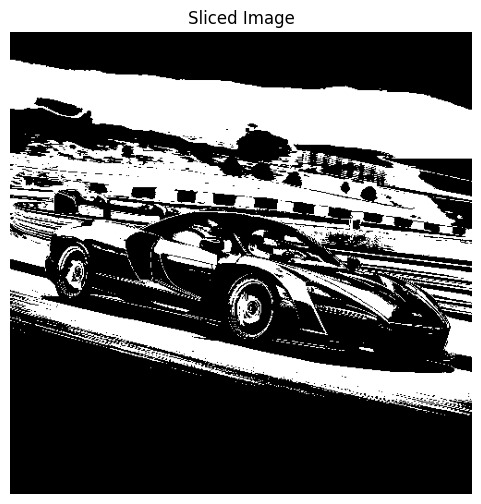

In [40]:
# Plot the sliced image
sliced_result_rgb = cv2.cvtColor(sliced_result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(sliced_result_rgb)
plt.axis('off')
plt.title('Sliced Image')
plt.show()

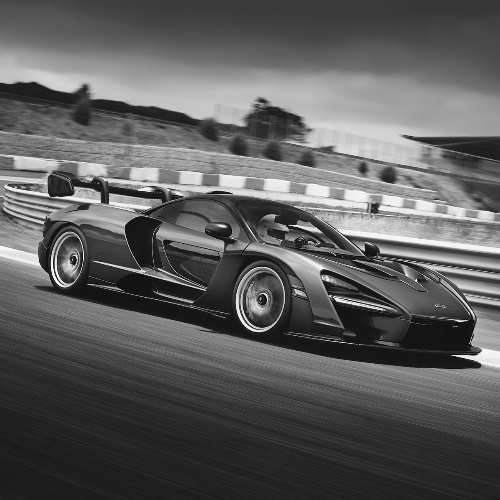

In [64]:
#histogram equalisation
mclaren_image= cv2.imread("mclaren_senna.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(mclaren_image)

In [65]:
equalized_image=cv2.equalizeHist(mclaren_image)

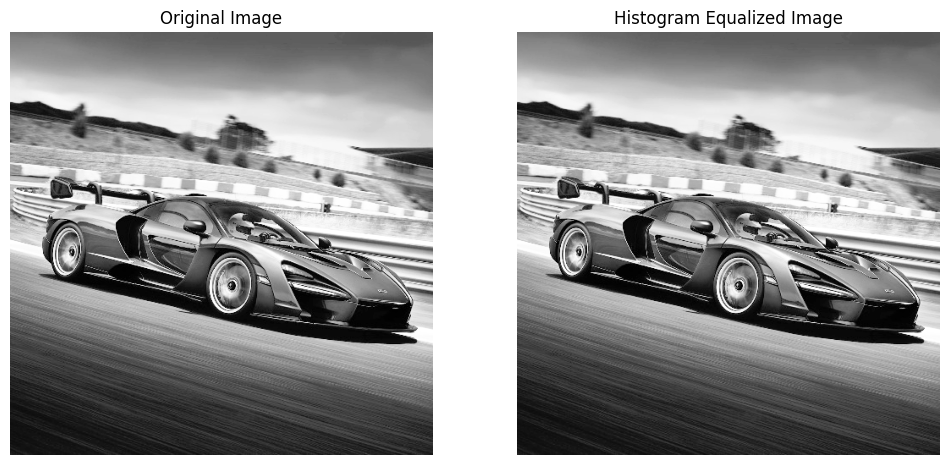

True

In [68]:
# Display the Original and Equalized Images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

# Save the equalized image
cv2.imwrite('equalized_image.jpg', equalized_image)

In [85]:
#user defined
image=cv2.imread("mclaren_senna.jpg",cv2.IMREAD_GRAYSCALE)

def histogram_equalization(image):
  hist,bins = np.histogram(image.flatten(),256,[0,256])
  cdf = hist.cumsum()
  cdf_normalized = cdf * float(hist.max()) / cdf.max()
  # Normalize the cdf
  cdf_m = np.ma.masked_equal(cdf,0)
  cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())
  cdf = np.ma.filled(cdf_m,0).astype('uint8')
  equalized_image = cdf[image]

  plt.plot(cdf_normalized, color = 'b')
  plt.hist(mclaren_image.flatten(),256,[0,256], color = 'r')
  plt.xlim([0,256])
  plt.legend(('cdf','histogram'), loc = 'upper left')
  plt.show()
  return equalized_image


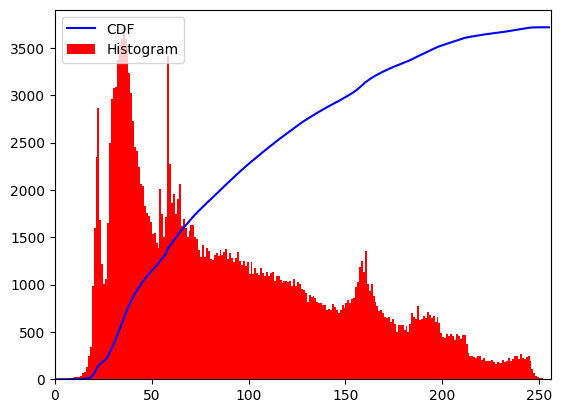

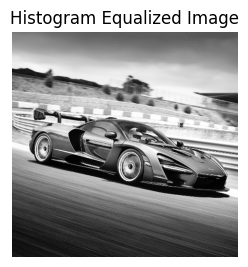

In [84]:
  # Call the function and plot the equalized image
equalized_image = histogram_equalization(image)
#plotting the image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()

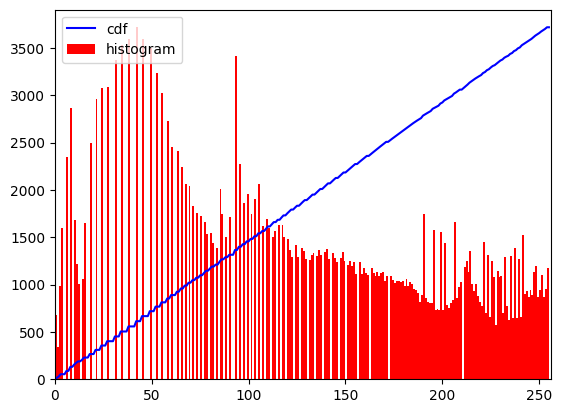

In [86]:
#plotting of equalized image
hist,bins = np.histogram(equalized_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [62]:
#user defined function
